Demo 8: Advanced Visualization
Name: Rovin Castelino
Registration Number: 240957001 
PC 46
21/3/25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('examples/Deliveries.csv')

In [3]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


1. Find and visualize the total runs scored by each team. 

<Axes: ylabel='batting_team'>

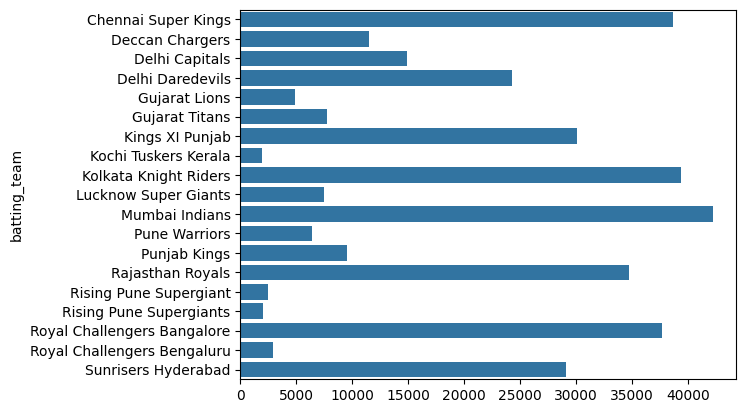

In [4]:
tab=df.groupby('batting_team')['total_runs'].sum()
sns.barplot(y=tab.index,x=tab.values,orient = 'h')

2. Identify and display the names of the top 10 highest-scoring batters with their total runs scored. 

<Axes: ylabel='batter'>

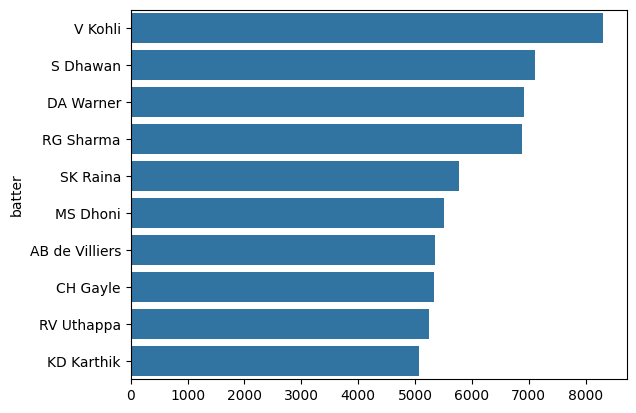

In [5]:
tab=df.groupby('batter')['total_runs'].sum()
tab=tab.sort_values(ascending=False).iloc[:10]
sns.barplot(y=tab.index,x=tab.values,orient = 'h')

3. Find and visualize the top 10 bowlers with the most wickets. 

<Axes: ylabel='bowler'>

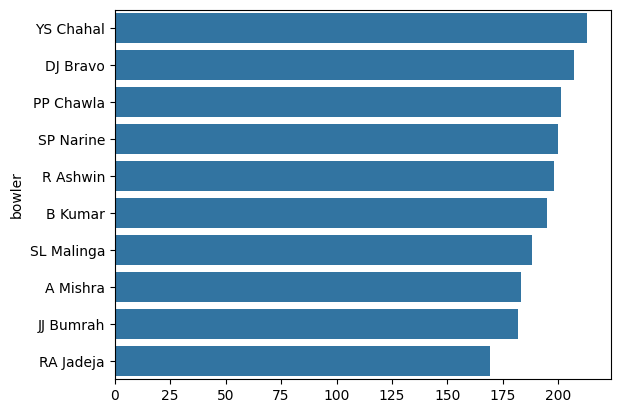

In [6]:
tab=df.groupby('bowler')['is_wicket'].sum()
tab=tab.sort_values(ascending=False).iloc[:10]
sns.barplot(y=tab.index,x=tab.values,orient = 'h')

4. Tabulate and visualize the total number of extras conceded by each team. 

<Axes: ylabel='batting_team'>

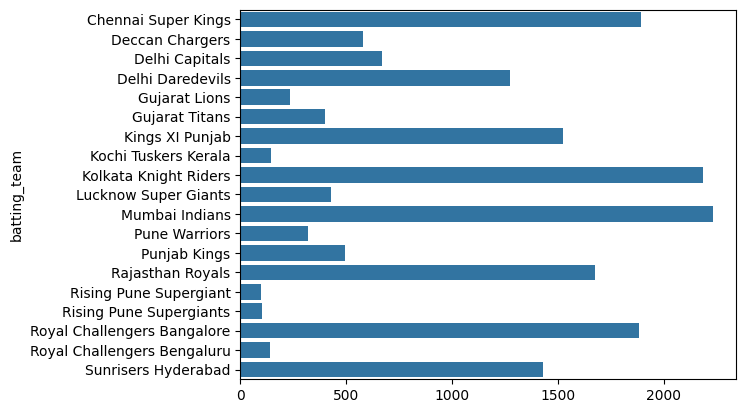

In [7]:
tab=df.groupby('batting_team')['extra_runs'].sum()
sns.barplot(y=tab.index,x=tab.values,orient = 'h')

5. Tabulate and visualize the batsmen (top 5) involved in the most run-outs. 

<Axes: ylabel='batter'>

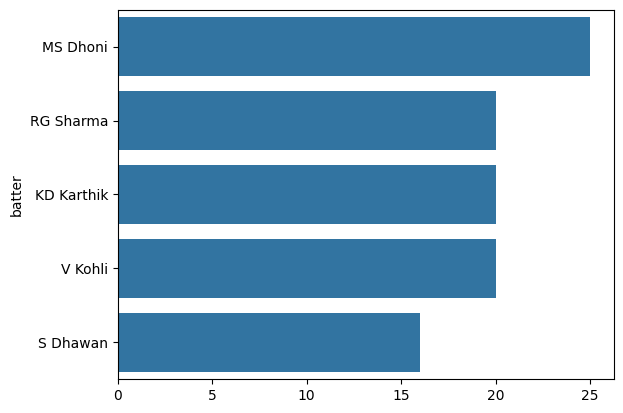

In [8]:
ro = df['dismissal_kind'] == 'run out'
tab = df['batter'][ro].value_counts().sort_values(ascending=False).iloc[:5]
sns.barplot(y=tab.index, x=tab.values, orient='h')

6. Tabulate and visualize the top 5 bowlers who conceded the most extras. 

<Axes: ylabel='bowler'>

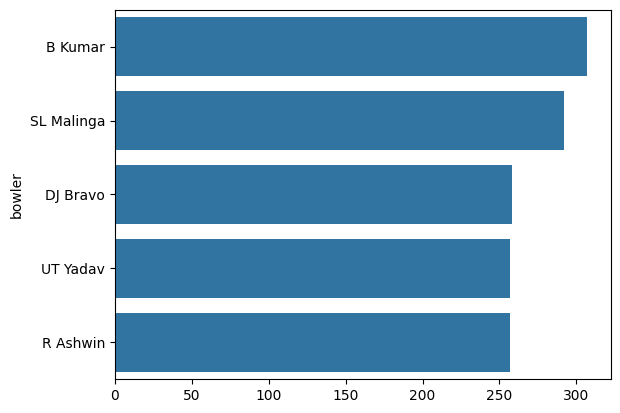

In [9]:
tab=df.groupby('bowler')['extra_runs'].sum()
tab=tab.sort_values(ascending=False).iloc[:5]
sns.barplot(y=tab.index, x=tab.values, orient='h')

7.  Tabulate and visualize the most common dismissal type. 

<Axes: ylabel='dismissal_kind'>

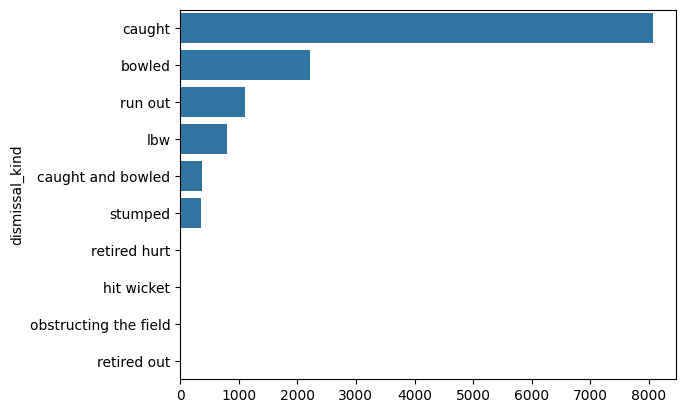

In [10]:
tab=df['dismissal_kind'].value_counts()
sns.barplot(y=tab.index, x=tab.values, orient='h')

8. Find and display which of the top 3 overs has the highest run rate. 

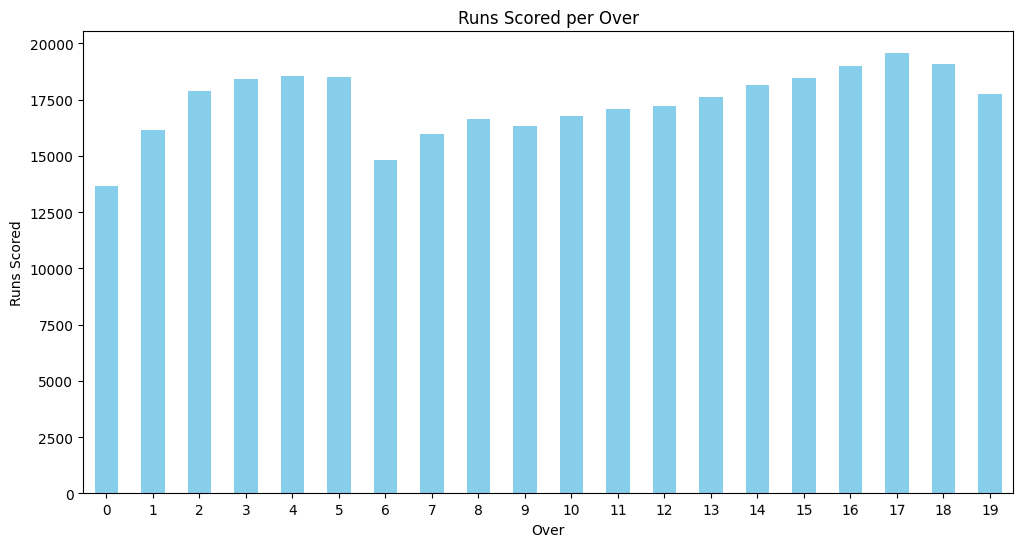

In [11]:
runs_per_over = df.groupby('over')['total_runs'].sum() 
plt.figure(figsize=(12, 6))
runs_per_over.plot(kind='bar', color='skyblue')
plt.title("Runs Scored per Over")
plt.xlabel("Over")
plt.ylabel("Runs Scored")
plt.xticks(rotation=1) 
plt.show()

9. Analyze and visualize powerplay performance (first 6 overs). 

In [12]:
df_powerplay = df[df['over'] <= 6]

runs_scored_powerplay = df_powerplay['total_runs'].sum()  # Adjust the column name as needed
wickets_taken_powerplay = df_powerplay['wickets'].sum()  # Adjust the column name as needed
balls_faced_powerplay = df_powerplay['balls'].sum()  # Adjust the column name as needed

performance_metrics = {
    'Runs Scored': runs_scored_powerplay,
    'Wickets Taken': wickets_taken_powerplay,
    'Balls Faced': balls_faced_powerplay
}

plt.figure(figsize=(8, 6))
plt.bar(performance_metrics.keys(), performance_metrics.values(), color=['blue', 'red', 'green'])

plt.title("Powerplay Performance (First 6 Overs)")
plt.ylabel("Count")
plt.show()

runs_per_over = df_powerplay.groupby('over')['runs'].sum()  # Adjust the column name as needed
runs_per_over.plot(kind='bar', figsize=(10, 6))
plt.title("Runs per Over in Powerplay (First 6 Overs)")
plt.xlabel("Over")
plt.ylabel("Runs Scored")
plt.show()


KeyError: 'wickets'